# 作業

實作本篇提到的三大概念

- 翻轉：實作上下左右的翻轉
- 縮放：比較鄰近差值與雙立方插值 (或雙線性插值) 的圖片品質
- 平移：建立 Translation Transformation Matrix 來做平移

In [1]:
import cv2
import time
import numpy as np
from matplotlib import pyplot as plt

img_path = 'data/lena.png'
img = cv2.imread(img_path)

h, w = img.shape[:2]
img = cv2.resize(img, (int(h/2.0),int(w/2.0)))

## 上下左右翻轉圖片

In [7]:
# 水平翻轉 (horizontal)
img_hflip = img[:,::-1,:]

# 垂直翻轉 (vertical)
img_vflip = img[::-1,:,:]

# 水平 + 垂直翻轉
img_hvflip = img[::-1,::-1,:]

# 組合 + 顯示圖片
hflip = np.hstack((img, img_hflip))
vflip = np.hstack((img_vflip, img_hvflip))
img_flip = np.vstack((hflip, vflip))
while True:
    cv2.imshow('flip image', img_flip)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

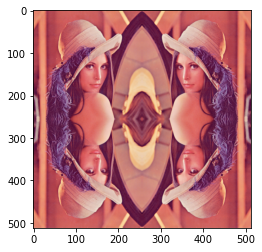

In [9]:
# 顯示結果圖
img_flip = cv2.cvtColor(img_flip, cv2.COLOR_BGR2RGB)
plt.imshow(img_flip)

## 縮放圖片

### 放大

我們先透過縮小圖片去壓縮原有圖片保有的資訊，再放大比較不同方法之間的速度與圖片品質

### 函數
```cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])```

where:

* src is the source, original or input image in the form of numpy array

* dsize is the desired size of the output image, given as tuple

* fx is the scaling factor along X-axis or Horizontal axis

* fy is the scaling factor along Y-axis or Vertical axis

* interpolation could be one of the following values.

    * INTER_NEAREST
    * INTER_LINEAR
    * INTER_AREA
    * INTER_CUBIC
    * INTER_LANCZOS4

ref: https://docs.opencv.org/master/da/d54/groupimgproctransform.html#ga47a974309e9102f5f08231edc7e7529d

In [6]:
# 將圖片縮小成原本的 20%
img_test = cv2.resize(img, None, fx=0.2, fy=0.2)

# 將圖片放大為"小圖片"的 8 倍大 = 原圖的 1.6 倍大
fx, fy = 8, 8

# 鄰近差值 scale + 計算花費時間
start_time = time.time()
img_area_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_NEAREST)
print('INTER_NEAREST zoom cost {}'.format(time.time() - start_time))

# 雙立方差補 scale + 計算花費時間
start_time = time.time()
img_cubic_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_CUBIC)
print('INTER_CUBIC zoom cost {}'.format(time.time() - start_time))

# 組合 + 顯示圖片
img_zoom = np.hstack((img_area_scale, img_cubic_scale))
while True:
    cv2.imshow('zoom image', img_zoom)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

INTER_NEAREST zoom cost 0.0010023117065429688
INTER_CUBIC zoom cost 0.017548084259033203


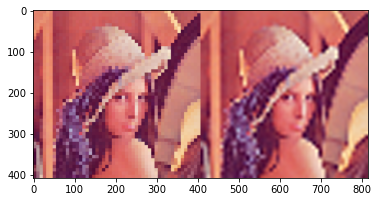

In [7]:
# 顯示結果圖
img_area_scale = cv2.cvtColor(img_area_scale, cv2.COLOR_BGR2RGB)
img_cubic_scale = cv2.cvtColor(img_cubic_scale, cv2.COLOR_BGR2RGB)
img_contact = np.hstack([img_area_scale, img_cubic_scale])
plt.imshow(img_contact)

## 平移幾何轉換
### 函數
```cv.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])->dst```

where:

* src	input image.

* dst	output image that has the size dsize and the same type as src .

* M	2×3 transformation matrix.

* dsize	size of the output image.

* flags	combination of interpolation methods (see InterpolationFlags) and the optional flag WARP_INVERSE_MAP that means that M is the inverse transformation ( dst→src ).

* borderMode	pixel extrapolation method (see BorderTypes); when borderMode=BORDER_TRANSPARENT, it means that the pixels in the destination image corresponding to the "outliers" in the source image are not modified by the function.

* borderValue	value used in case of a constant border; by default, it is 0.


In [11]:
# 設定 translation transformation matrix
# x 平移 50 pixel; y 平移 100 pixel
M = np.array([
    [1, 0,  50],
    [0, 1, 100]
], dtype=np.float32)
shift_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# 組合 + 顯示圖片
img_shift = np.hstack((img, shift_img))
while True:
    cv2.imshow('shift image', img_shift)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

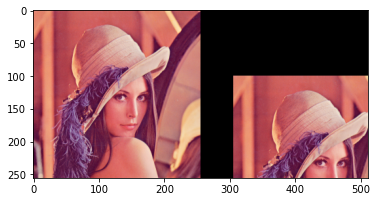

In [10]:
# 顯示顯示結果圖
img_shift = cv2.cvtColor(img_shift, cv2.COLOR_BGR2RGB)
plt.imshow(img_shift)